**Exploratory Data Analysis**

To start exploring the data I will first start off with importing the necessary libraries I will be needing

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

**House Data Info**

The dataframe that I will be working with is a houses data set, the first step is that I will read into the csv file

In [2]:
# Read the dataset into a data table using Pandas and show the first 5 rows
house_df = pd.read_csv('Data/house_data_set.csv')
house_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0


I will get additional information on the dataframe to see if it has any null values and the types of data

In [3]:
#Basic info on data
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_built           42703 non-null  int64  
 1   stories              42703 non-null  int64  
 2   num_bedrooms         42703 non-null  int64  
 3   full_bathrooms       42703 non-null  int64  
 4   half_bathrooms       42703 non-null  int64  
 5   livable_sqft         42703 non-null  int64  
 6   total_sqft           42703 non-null  int64  
 7   garage_type          42703 non-null  object 
 8   garage_sqft          42703 non-null  int64  
 9   carport_sqft         42703 non-null  int64  
 10  has_fireplace        42703 non-null  bool   
 11  has_pool             42703 non-null  bool   
 12  has_central_heating  42703 non-null  bool   
 13  has_central_cooling  42703 non-null  bool   
 14  house_number         42703 non-null  int64  
 15  street_name          42703 non-null 

In [4]:
house_df.describe()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,house_number,unit_number,zip_code,sale_price
count,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,3088.000000,42703.000000,4.270300e+04
mean,1990.993209,1.365759,3.209283,1.923659,0.527153,1987.758986,2127.155446,455.849800,41.656324,18211.767347,2027.395402,11030.991476,4.135071e+05
std,19.199987,0.513602,1.043396,0.759699,0.499268,846.766270,922.807342,243.453463,168.715867,27457.109993,1141.383770,573.576228,3.185497e+05
min,1852.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,5.000000,-4.000000,0.000000,0.000000,3.000000,10004.000000,6.260000e+02
25%,1980.000000,1.000000,3.000000,1.000000,0.000000,1380.000000,1466.000000,412.000000,0.000000,674.000000,1063.000000,10537.000000,2.708990e+05
50%,1994.000000,1.000000,3.000000,2.000000,1.000000,1808.000000,1937.000000,464.000000,0.000000,4530.000000,2033.000000,11071.000000,3.780010e+05
75%,2005.000000,2.000000,4.000000,2.000000,1.000000,2486.000000,2640.000000,606.000000,0.000000,24844.500000,2921.000000,11510.000000,4.976970e+05
max,2017.000000,4.000000,31.000000,8.000000,1.000000,12406.000000,15449.000000,8318.000000,9200.000000,99971.000000,3998.000000,11989.000000,2.104200e+07


This data set has 19 house features (not counting sale price) and 42703 data entries, I will be using those features in my model to help predict the house sale price.

In [5]:
house_df.corr()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,unit_number,zip_code,sale_price
year_built,1.000000,0.340048,0.354184,0.507460,0.018290,0.501600,0.441766,0.418244,-0.183255,0.133737,-0.023889,0.535366,0.566484,0.005649,-0.012783,0.034625,0.227948
stories,0.340048,1.000000,0.411178,0.386661,0.188167,0.402780,0.345969,0.263845,-0.164134,0.177420,-0.027474,0.145494,0.176515,-0.008927,0.035306,-0.020229,0.130693
num_bedrooms,0.354184,0.411178,1.000000,0.547654,0.090575,0.646047,0.599964,0.479839,-0.224600,0.310697,0.156539,0.179828,0.190266,-0.002300,0.029626,-0.068778,0.316768
full_bathrooms,0.507460,0.386661,0.547654,1.000000,-0.326024,0.718242,0.683580,0.419770,-0.071632,0.234325,0.169734,0.273856,0.310613,0.006440,-0.015574,0.012807,0.429947
half_bathrooms,0.018290,0.188167,0.090575,-0.326024,1.000000,0.103696,0.108050,0.154152,-0.155806,0.110508,0.046666,0.082710,0.060697,-0.006542,0.042163,-0.022586,0.094280
livable_sqft,0.501600,0.402780,0.646047,0.718242,0.103696,1.000000,0.975450,0.597781,-0.179945,0.321354,0.261967,0.257247,0.294371,0.001166,0.019502,-0.016870,0.627508
total_sqft,0.441766,0.345969,0.599964,0.683580,0.108050,0.975450,1.000000,0.586785,-0.180651,0.314783,0.290305,0.228405,0.266848,-0.000965,0.017894,-0.006054,0.660714
garage_sqft,0.418244,0.263845,0.479839,0.419770,0.154152,0.597781,0.586785,1.000000,-0.406683,0.415696,0.202434,0.240686,0.284199,-0.005734,0.041400,-0.046963,0.448928
carport_sqft,-0.183255,-0.164134,-0.224600,-0.071632,-0.155806,-0.179945,-0.180651,-0.406683,1.000000,-0.268507,-0.078099,-0.008206,-0.057609,0.001885,-0.025643,0.074363,-0.197384
has_fireplace,0.133737,0.177420,0.310697,0.234325,0.110508,0.321354,0.314783,0.415696,-0.268507,1.000000,0.229999,0.177342,0.190158,-0.008864,0.003104,-0.048129,0.275813


**Data Cleaning & Preparation**

In this section, I will start by cleaning the house dataframe before drawing any conclusions. It will help inspect the data better and get a more accurate general understanding of the data at hand.

**Step 1:** check  all columns in data frame

In [6]:
house_df.columns

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_type',
       'garage_sqft', 'carport_sqft', 'has_fireplace', 'has_pool',
       'has_central_heating', 'has_central_cooling', 'house_number',
       'street_name', 'unit_number', 'city', 'zip_code', 'sale_price'],
      dtype='object')

Now that I have seen all the columns and what features the dataframe entails, I want to select only the features that will be relative and useful to my model, in this next section I will be preparing the desired features. 

**Step 2:** Remove unwanted columns

There are some features that will not be useful in my model therefore, I will delete the columns that I won't need. 

The house number isn't going to be useful to include in the model since it's not likely that anyone buys a house because the street number assigned to it, it's just a random number. So I will drop this field from the model. 
The same will go for unit number. As for street name, city, and zip code columns, the location of a house has a big influence on the value so we need to include at least some of this information in the model. However, these columns provide duplicate information. For example, if we know the zip code of a house, we already know what city it's in, so I don't need to include both city and zip code in my model. I will also delete street name since.

In [7]:
#There are 4 columns that I will remove since i will not included it in my model
house_df.drop(['house_number', 'street_name', 'unit_number','zip_code'], axis = 1, inplace=True)
house_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,city,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,Hallfort,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,Hallfort,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,Lake Christinaport,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,Lake Christinaport,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,Lake Christinaport,207897.0


**Step 3:** Check for any duplicates

In [8]:
house_df.duplicated().value_counts()

False    42703
dtype: int64

no duplicates, so we're good to proceed

**Step 4:** Check if the features columns need any preparation

The columns with true and false values will be fine to use in my model since they'll be treated as one or zero automatically, so no extra work is needed to prepare it. 


**Numerical Variables:**



In [9]:
# list of numerical variables
numerical_features = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
house_df[numerical_features].head()

Number of numerical variables:  14


,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,sale_price
0,1978,1,4,1,1,1689,1859,508,0,True,False,True,True,270897.0
1,1958,1,3,1,1,1984,2002,462,0,True,False,True,True,302404.0
2,2002,1,3,2,0,1581,1578,0,625,False,False,True,True,2519996.0
3,2004,1,4,2,0,1829,2277,479,0,True,False,True,True,197193.0
4,2006,1,4,2,0,1580,1749,430,0,True,False,True,True,207897.0


Numerical variables are usually of 2 types: Continous variables and Discrete Variables

Discrete Variable: a variable whose value is obtained by counting.

Continuous Variable: a variable which can take an uncountable set of values or infinite set of values.

***Discrete Variables:***

In [10]:
discrete_feature=[feature for feature in numerical_features if len(house_df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 8


['stories',
 'num_bedrooms',
 'full_bathrooms',
 'half_bathrooms',
 'has_fireplace',
 'has_pool',
 'has_central_heating',
 'has_central_cooling']

In [11]:
house_df[discrete_feature].head()

,stories,num_bedrooms,full_bathrooms,half_bathrooms,has_fireplace,has_pool,has_central_heating,has_central_cooling
0,1,4,1,1,True,False,True,True
1,1,3,1,1,True,False,True,True
2,1,3,2,0,False,False,True,True
3,1,4,2,0,True,False,True,True
4,1,4,2,0,True,False,True,True


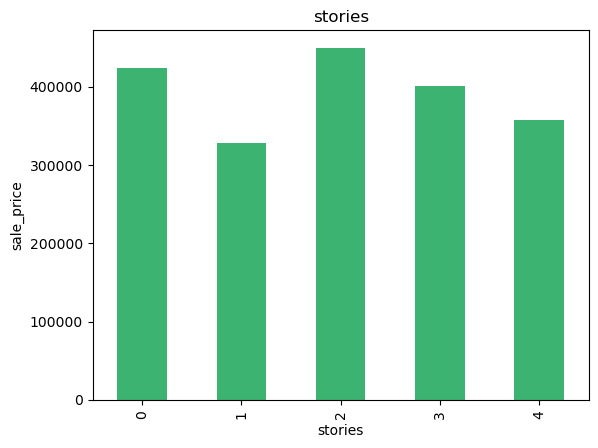

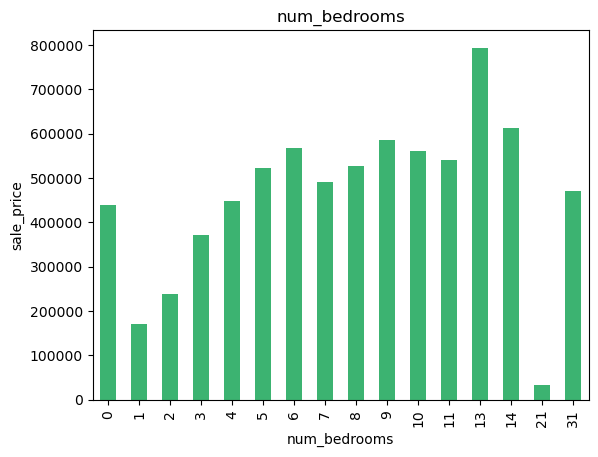

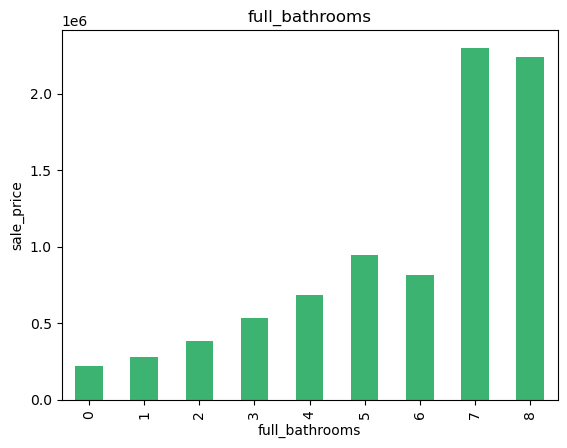

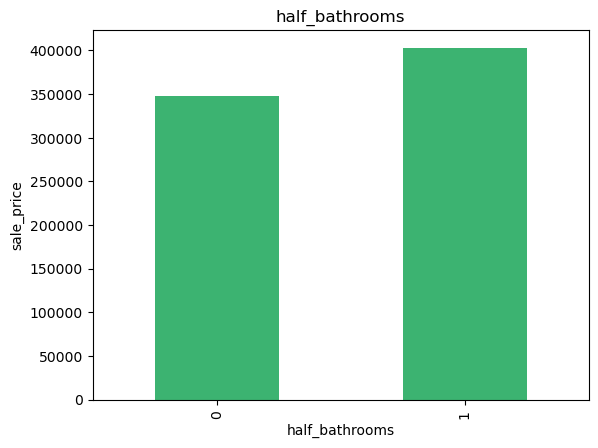

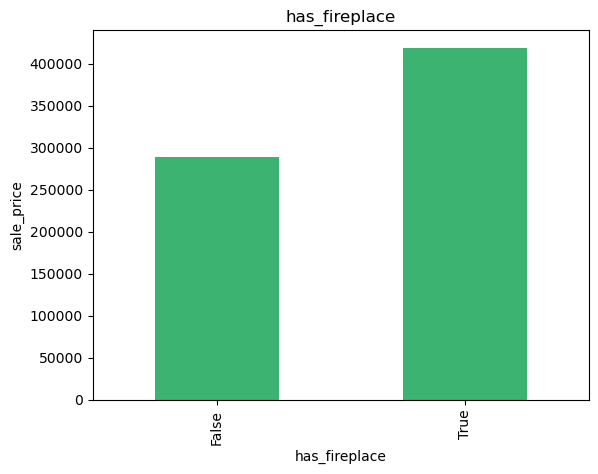

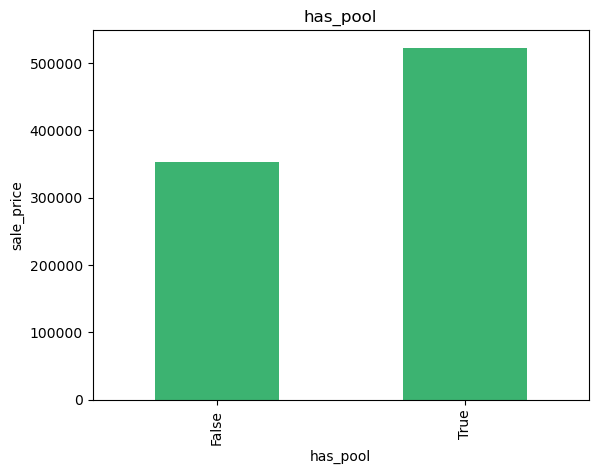

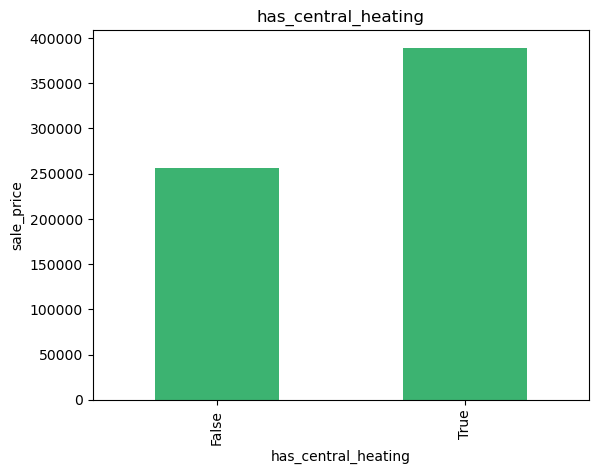

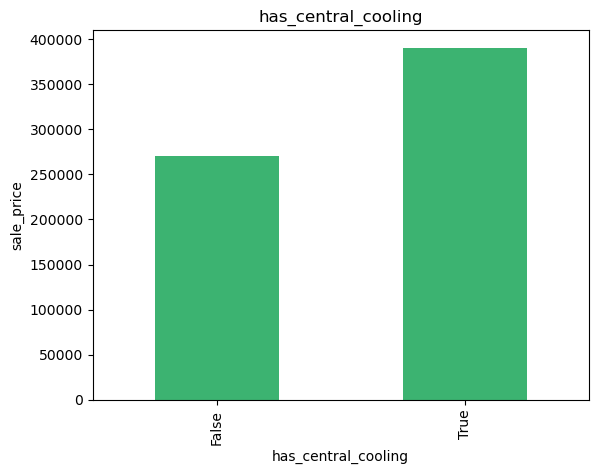

In [12]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=house_df.copy()
    data.groupby(feature)['sale_price'].median().plot.bar(color='mediumseagreen')
    plt.xlabel(feature)
    plt.ylabel('sale_price')
    plt.title(feature)
    plt.show()

***Continuous Variables:***

In [13]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
house_df[continuous_feature].head()

Continuous feature Count 6


,year_built,livable_sqft,total_sqft,garage_sqft,carport_sqft,sale_price
0,1978,1689,1859,508,0,270897.0
1,1958,1984,2002,462,0,302404.0
2,2002,1581,1578,0,625,2519996.0
3,2004,1829,2277,479,0,197193.0
4,2006,1580,1749,430,0,207897.0


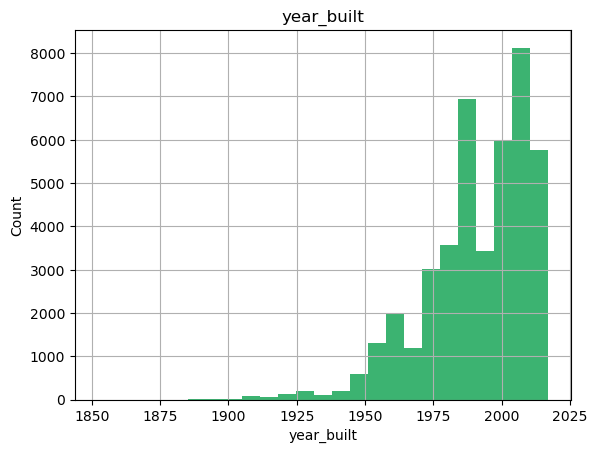

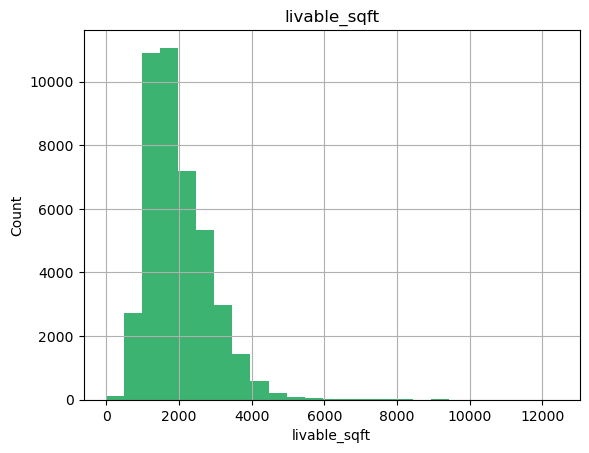

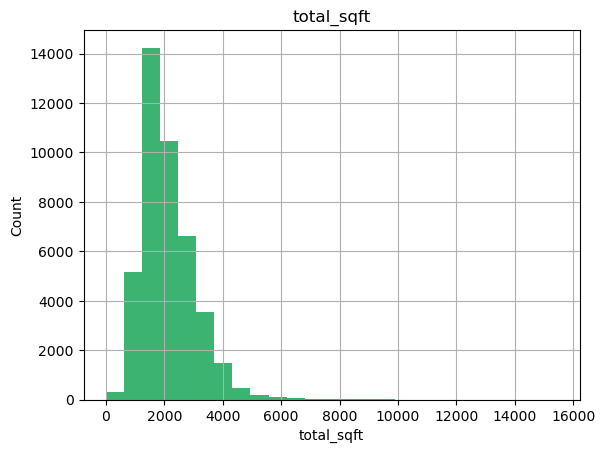

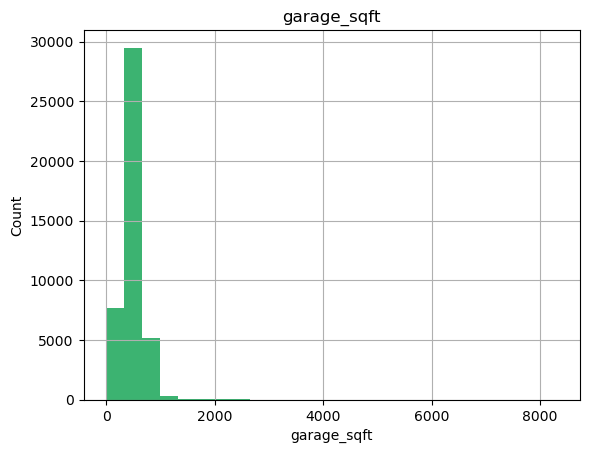

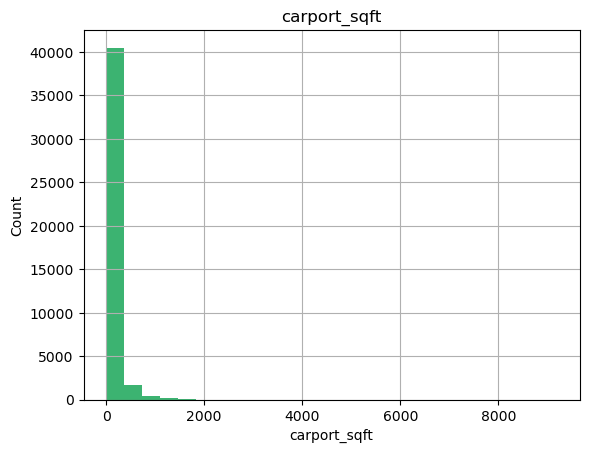

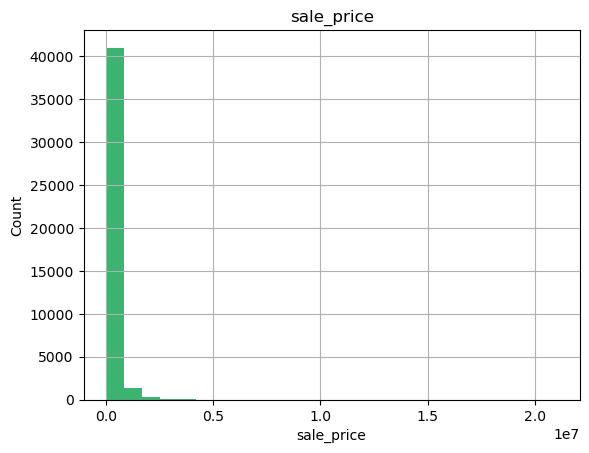

In [14]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=house_df.copy()
    data[feature].hist(bins=25, color='mediumseagreen')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()





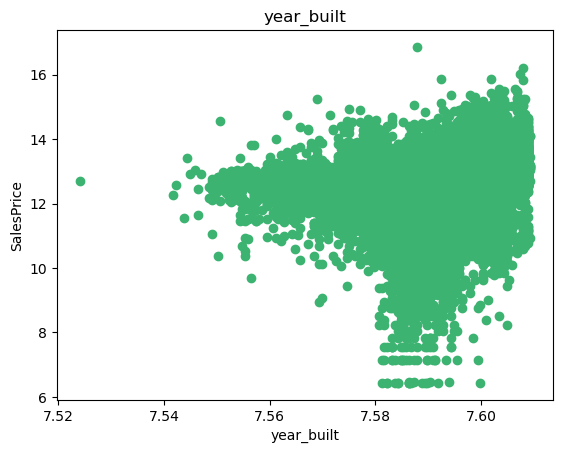

C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


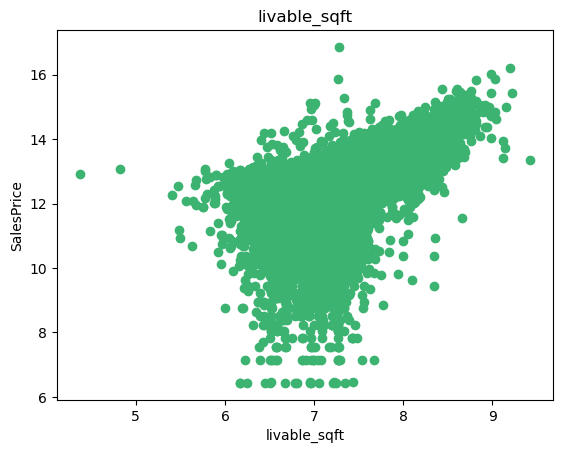

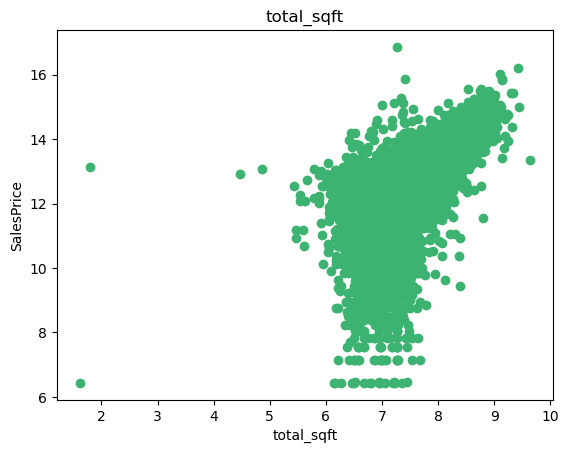

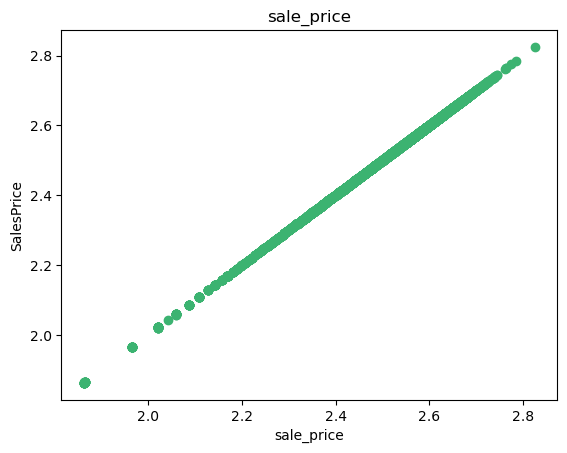

In [15]:
for feature in continuous_feature:
    data=house_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data["sale_price"]=np.log(data["sale_price"])
        plt.scatter(data[feature],data["sale_price"],color='mediumseagreen')
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

**Categorical Variables**:

I will use one-hot encoding to the columns with categorical values in order to use it in my model: the garage_type and city. One-Hot Encoding is the process of creating dummy variables for categorical variables. For every categorical feature, a new numerical variable is created.

In [16]:
categorical_features=[feature for feature in house_df.columns if data[feature].dtypes=='O']
print(categorical_features)

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(house_df[feature].unique())))

['garage_type', 'city']
The feature is garage_type and number of categories are 3
The feature is city and number of categories are 47


In [17]:
house_df['city'].value_counts()

Chadstad                4962
Coletown                3739
Jeffreyhaven            2981
North Erinville         2868
Port Andrealand         2669
Hallfort                2448
Lewishaven              2271
South Anthony           1849
Lake Jack               1831
Davidfort               1703
Lake Dariusborough      1441
West Ann                1397
East Lucas              1359
Port Jonathanborough    1344
Scottberg               1009
Lake Christinaport       833
East Amychester          792
Joshuafurt               745
West Lydia               709
Morrisport               654
Lake Carolyn             637
West Gregoryview         615
Wendybury                587
Amystad                  561
Port Adamtown            416
Richardport              297
Jenniferberg             275
Justinport               272
East Janiceville         248
Brownport                209
Clarkberg                174
West Gerald              151
West Brittanyview        120
East Justin              112
West Terrence 

In [18]:
house_df['garage_type'].value_counts()

attached    34079
none         5912
detached     2712
Name: garage_type, dtype: int64

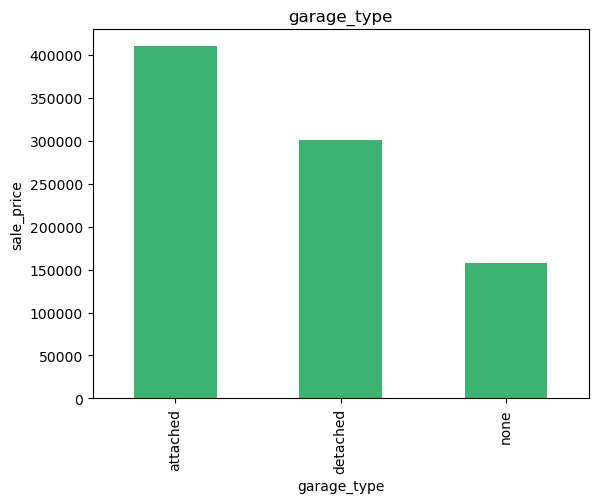

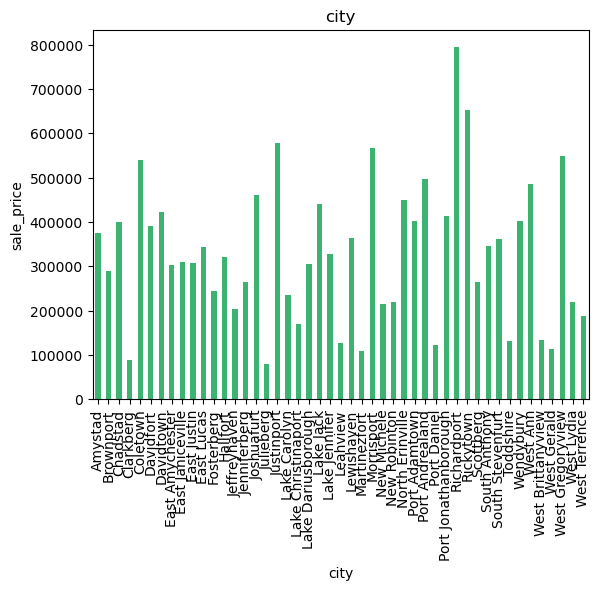

In [19]:
for feature in categorical_features:
    data=house_df.copy()
    data.groupby(feature)["sale_price"].median().plot.bar(color='mediumseagreen')
    plt.xlabel(feature)
    plt.ylabel("sale_price")
    plt.title(feature)
    plt.show()

C:\Users\dtaher\AppData\Local\Temp\ipykernel_11840\3415022935.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


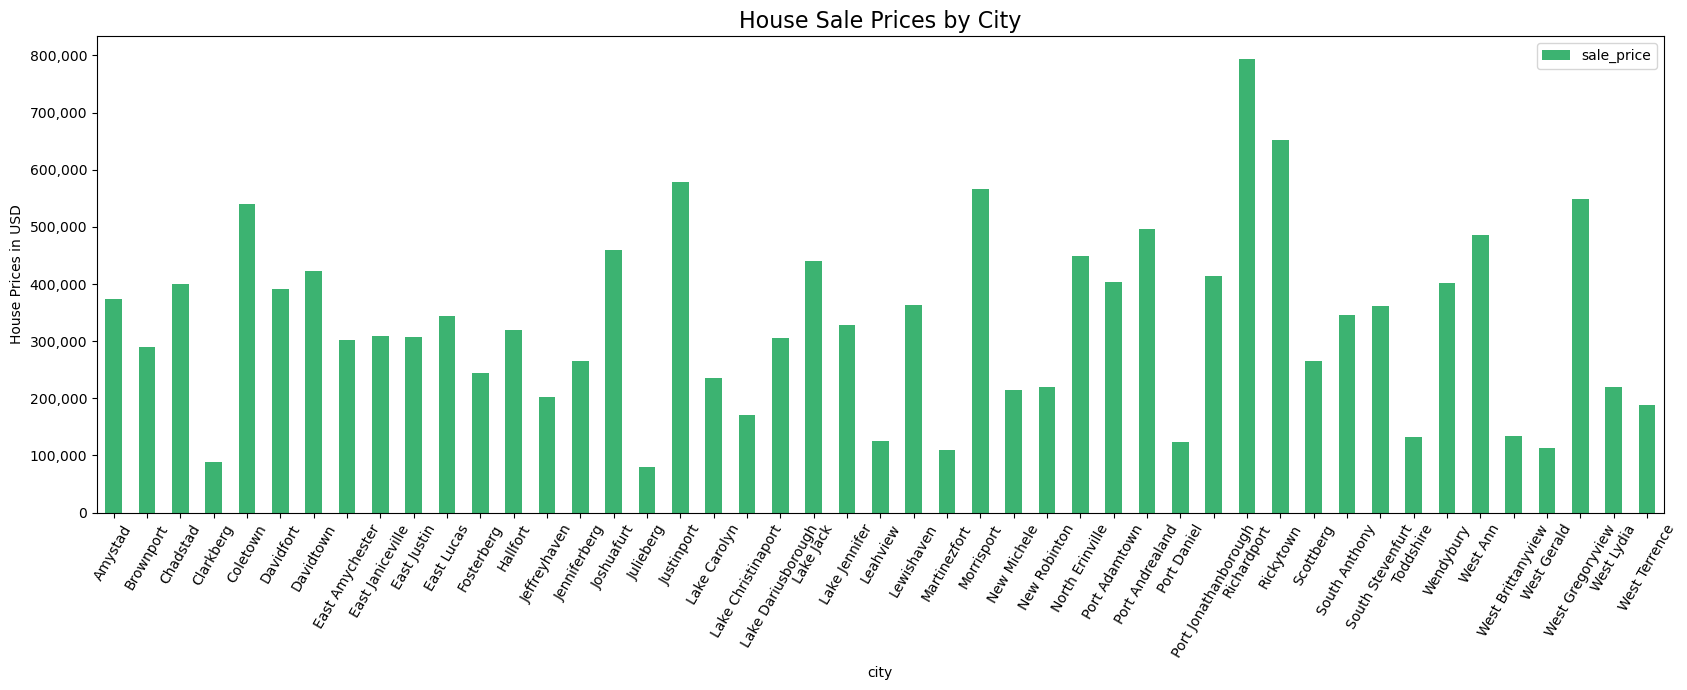

In [20]:
fig, ax = plt.subplots(figsize=(17,7))
house_df.groupby("city").median().plot.bar(y="sale_price", ax=ax, color='mediumseagreen');
# format the y label 1e6
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xticks(rotation=60)
plt.title('House Sale Prices by City', fontsize=16)
plt.ylabel('House Prices in USD')
plt.tight_layout()
plt.show()

I will now do one-hot encoding to the categorical variables so I can use it in my model

In [21]:
# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(house_df, columns=['garage_type', 'city'])
features_df

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,...,city_South Anthony,city_South Stevenfurt,city_Toddshire,city_Wendybury,city_West Ann,city_West Brittanyview,city_West Gerald,city_West Gregoryview,city_West Lydia,city_West Terrence
0,1978,1,4,1,1,1689,1859,508,0,True,...,0,0,0,0,0,0,0,0,0,0
1,1958,1,3,1,1,1984,2002,462,0,True,...,0,0,0,0,0,0,0,0,0,0
2,2002,1,3,2,0,1581,1578,0,625,False,...,0,0,0,0,0,0,0,0,0,0
3,2004,1,4,2,0,1829,2277,479,0,True,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,4,2,0,1580,1749,430,0,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,1982,1,1,1,0,591,627,0,200,False,...,0,0,0,0,0,0,0,0,0,0
42699,1983,1,1,1,0,592,624,0,204,False,...,0,0,0,0,0,0,0,0,0,0
42700,1983,1,1,1,0,594,618,0,197,False,...,0,0,0,0,0,0,0,0,0,0
42701,1981,1,3,2,0,1398,1401,401,0,False,...,0,0,0,0,0,0,0,0,0,0


In [22]:
features_df.columns

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft',
       'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating',
       'has_central_cooling', 'sale_price', 'garage_type_attached',
       'garage_type_detached', 'garage_type_none', 'city_Amystad',
       'city_Brownport', 'city_Chadstad', 'city_Clarkberg', 'city_Coletown',
       'city_Davidfort', 'city_Davidtown', 'city_East Amychester',
       'city_East Janiceville', 'city_East Justin', 'city_East Lucas',
       'city_Fosterberg', 'city_Hallfort', 'city_Jeffreyhaven',
       'city_Jenniferberg', 'city_Joshuafurt', 'city_Julieberg',
       'city_Justinport', 'city_Lake Carolyn', 'city_Lake Christinaport',
       'city_Lake Dariusborough', 'city_Lake Jack', 'city_Lake Jennifer',
       'city_Leahview', 'city_Lewishaven', 'city_Martinezfort',
       'city_Morrisport', 'city_New Michele', 'city_New Robinton',
       'city_North Erinville', 

The target variable that I'm trying to predict is the house's sale price. the different features in my data set will be utilized as the predictors of the target variable.

Therefore, I will need to separate the sale price column from the features data frame so the ML model doesn't see the sale price in the input data.

In [23]:
# Remove the sale price from the feature data
features_df.drop(['sale_price'], axis = 1, inplace=True)
features_df.columns

Index(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms',
       'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft',
       'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating',
       'has_central_cooling', 'garage_type_attached', 'garage_type_detached',
       'garage_type_none', 'city_Amystad', 'city_Brownport', 'city_Chadstad',
       'city_Clarkberg', 'city_Coletown', 'city_Davidfort', 'city_Davidtown',
       'city_East Amychester', 'city_East Janiceville', 'city_East Justin',
       'city_East Lucas', 'city_Fosterberg', 'city_Hallfort',
       'city_Jeffreyhaven', 'city_Jenniferberg', 'city_Joshuafurt',
       'city_Julieberg', 'city_Justinport', 'city_Lake Carolyn',
       'city_Lake Christinaport', 'city_Lake Dariusborough', 'city_Lake Jack',
       'city_Lake Jennifer', 'city_Leahview', 'city_Lewishaven',
       'city_Martinezfort', 'city_Morrisport', 'city_New Michele',
       'city_New Robinton', 'city_North Erinville', 'city_Port Adamtown',

I will create X and y arrays. 

X to represent the input features (house features, indepedent variables)

y to represent the expected output to predict (house sale price, dependent variable)

I will be creating my arrays using Numpy matrix because it is more efficient and will make my code to run faster, so I will be vectorizing my code.

In [24]:
# the X array will be the contents of my features dataframe.
# I will call the to_numpy function to make sure the data is a numpy matrix data type and not a pandas dataframe
X = features_df.to_numpy()

# the y array will be the sales price column from my original dataset
y = house_df['sale_price'].to_numpy()

**Train & Test Data**

In this section, I will perform a train-test-split. When performing a train-test-split, it is important that the data is **randomly** split. Another thing to consider is just **how big** each training and testing set should be. I split the data into a training data set and a test data set. I will use Scikit-learn to do this in one linne of code. I will do the training set size at 70% and 30% for the testing set.

By training and testing, it will allow us to prove the accuracy of the model and prove that it actually learned general rules for predicting house prices.

In [25]:
#This command will shuffle all of our data so it's in a random order, and then split it into two groups. 
#The test size equals 0.3 parameter tells it we want to keep 70% of the data for training and 30%for testing. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Creating and Training ML model**
For this machine learning model, I will be using the scikit-learn gradient boosting regressor. this will be one line of code!

I will need to set the hyper-parameters that control how the gradient boosting regressor model will run. 

**Gradient boosting** is an ensemble learning algorithm meaning that it uses many simple machine learning models that work together to give a more accurate answer than any individual model could by itself. The basic data structure behind gradient boosting is a decision tree, it creates a combination of decision trees that build on each other.



n_estimators: determines how many decision trees to build, higher numbers are more accurate but require more time to run the model.

learning_rate: controls how much each additional decision tree influences the overall prediction. Lower rates usually lead to higher accuracy, but only works if n_estimators is set to a high value.

max_depth: controls how many layers deep each individual decision tree can be.

min_samples_leaf: controls how many times a value must appear in my training set for a decision tree-
to make a decision based on it.

max_features: the percentage of features in the model that we randomly choose to consider each time we create a branch in our decision tree.

loss: controls how scikit-learn calculates the error rate or cost as it learns.
    huber function: is a combination of the squarred error for regression and the absolute error of regression.

In [26]:
#Fit regression model
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber')

In [27]:
# next I tell the model to train using the training data set by calling scikit-learn's fit function on the model.
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=1000)

Now that the ML model is trained, the next step is to measure the performance of the model is.

I will use the **mean absolute error** to check the accuracy of my models predictions.
Mean absolute error expresses how incorrect the model is in an average prediction. 

In [28]:
# error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 48436.2516


In [29]:
# error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 58627.1475


For the training set, the MAE is 47,847 dollars. This means that our model is off by about 48,000 dollars in a given prediction. So the model was able to predict the value of every house in the training data set to within $48,000 of the real price.

For the test set, the MAE was a bit higher at $59,443. Which means that the model still works for houses it has never seen before, but not quite as well as for the training houses.

Given the wide range of houses in my model, that is quite good.


**MSE explanation**

By looking at the error rates for the training and testing data, we determine how well our machine learning model fits. 

If the error rate for our training data is very low, but the error rate for our test data set is very high, that means our model is **overfitting**. We know this because the model perfectly fit our training data, but it didn't generalize to fit the test data at all. Models that are too complex will overfit. We need to make the model less complex. Gradient boosting model can be made less complex by using fewer decision trees, making each decision tree smaller, or by preferring simple decision trees over complex ones. 

It's also possible that the model is **underfitting**, because we don't have enough training data. If reducing the complexity of the model doesn't help, it's possible that we might not have enough training data to solve the problem. If the error rate for both our training data set and test data sets are high, that means our model is underfit. It didn't capture the patterns in the data set very well. Models that are too simple will underfit so the model needs to be more complex. A gradient boosting model can be more complex by using more decision trees, or making each decision tree deeper. 

By tuning the hyper parameters of the model, we can fix underfitting and overfitting issues, and end up with a model that fits well.

If the error rate for both our training set and test sets are low, that means our model's working well. It is accurate for the training data and test data. So that means the model has learned the real patterns behind the data. 

**Grid Search**

Adjusting the hyperparameters on our model fixes underfitting and overfitting, but the issue is, there are many possible combinations and it gets time consuming. 

**Grid Search** is a solution for this, it allows us to list out a range of settings we want to try for each parameter, and we literally try them all. 

It trains and tests the model for every combination of parameters. The combination of parameters that generates the best predictions are the set of parameters we should use for our real model. Scikit-learn automates this process by using grid_search.py. 

In [30]:
#this time I declare our model without passing in any parameters.
model = ensemble.GradientBoostingRegressor()

In [46]:
#the param grid has an array for each parameter. 
param_grid = {
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.05, 0.01],
    'loss': ['lad', 'huber']
}

In [47]:
# Define the grid search i want to run.
# this takes in the model object, the param_grid, and the number of CPUs i want to use to run my grid search.
gs_cv = GridSearchCV(model, param_grid, n_jobs=-1)

Since the grid search is actually training a model for every possible combination of parameters in the para grid it will take a long time to run. When it's done training, it will print out the model hyperparameters that work the best.

In [49]:
# Run the grid search - on only the training data without giving it access to the test data set
# CV: cross-validation
# this function will slice up the training data into smaller subsets ad use it again to train and test different models
gs_cv.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'learning_rate': [0.05, 0.01],
                         'loss': ['lad', 'huber'], 'max_depth': [4, 6],
                         'max_features': [1.0, 0.3],
                         'min_samples_leaf': [5, 13],
                         'n_estimators': [500, 1500]})

In [53]:
# After running for 4 hours, I will print the parameters that gave me the best result!
print(gs_cv.best_params_)

{'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 5, 'n_estimators': 1500}


In [51]:
# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)


Training Set Mean Absolute Error: 45741.3935


In [52]:
# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 58297.5119
